# GLOC Detector Dev Notes

WNixalo

2018/2/8

---

I thought it'd be a good idea to have a notebook of thoughts/ideas/notes as I work on my projects. May help to keep my head in order (idea perhaps for future teams?) and also help with documentation for post-project writeups.. Hmm.

**Finetuning 1st Stage Detector**

CAMs Heatmaps FastAI replacing Keras/RetinaNet if I decide to make further major changes to the first stage detector.

Keras learning-rate is part of the optimizer attribute of the model? Doesn't seem immediately accessible: `model.optimizer.lr` returns: 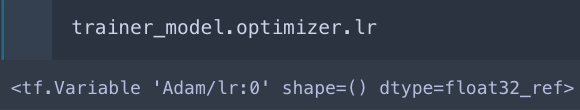